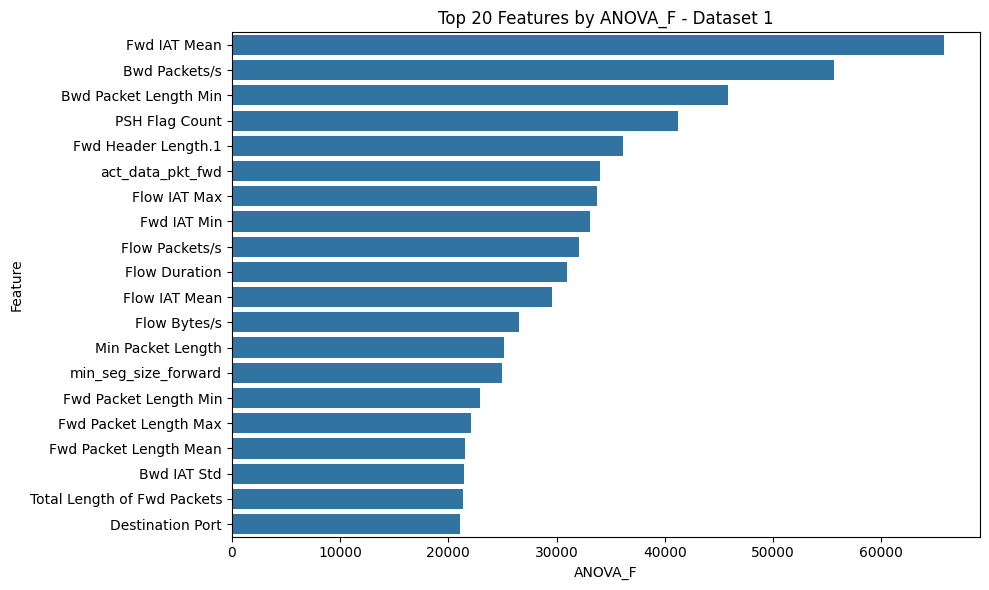

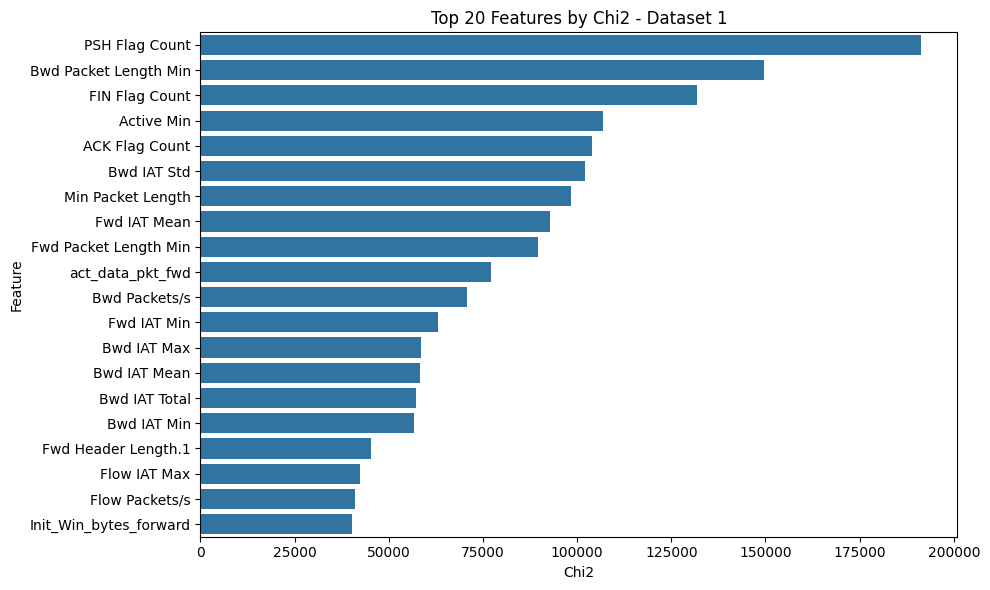

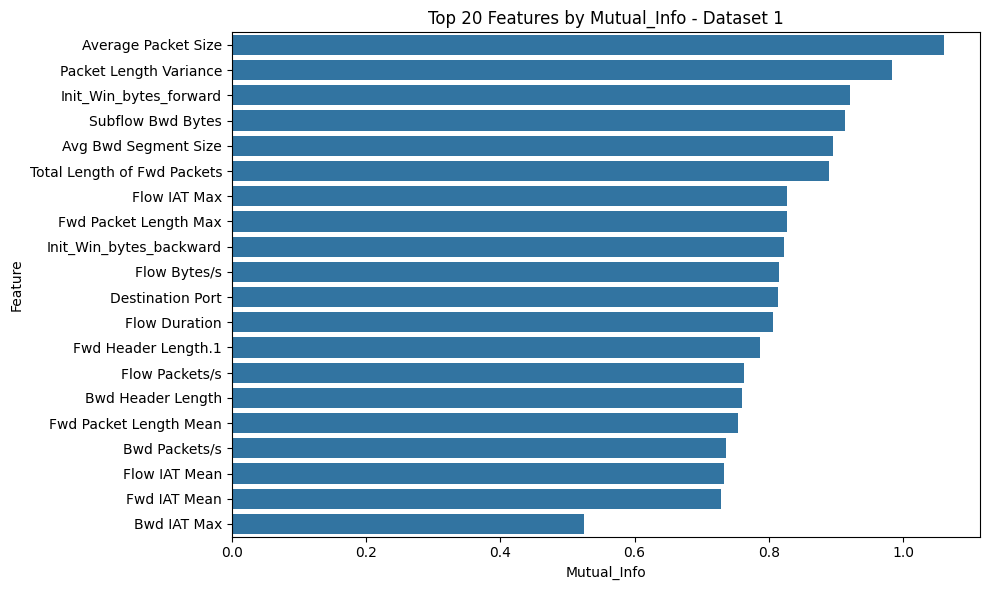

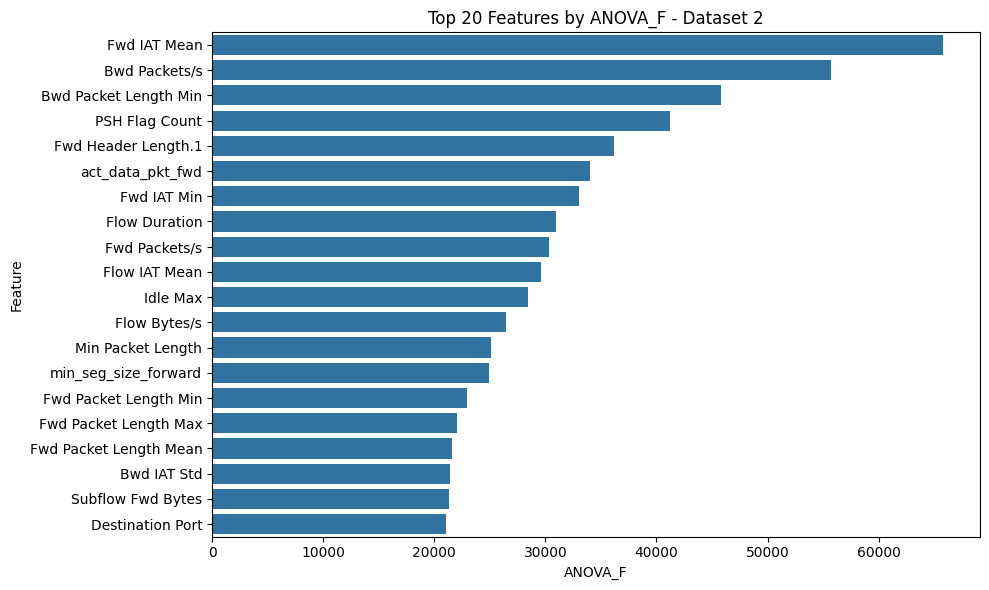

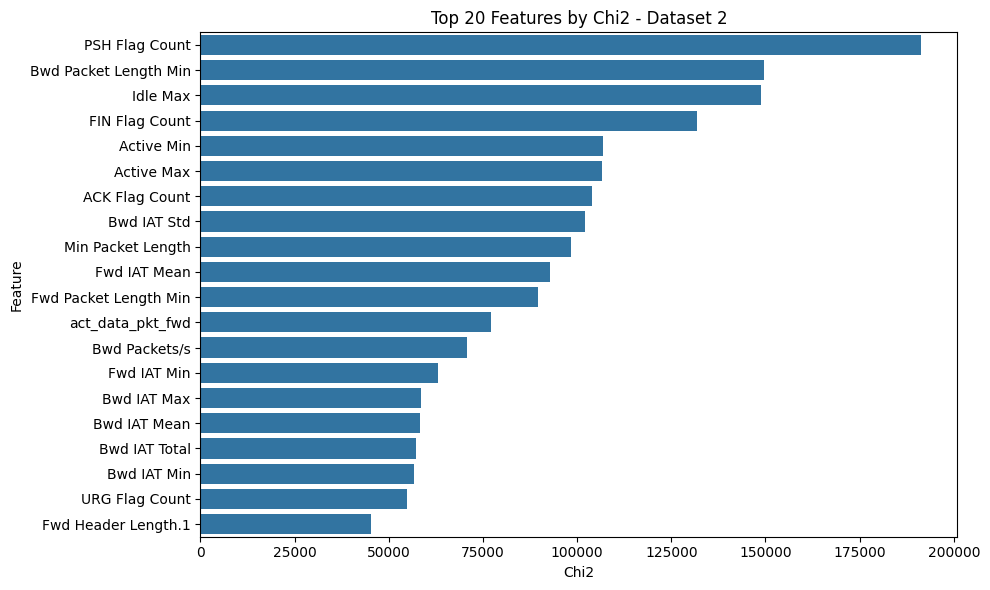

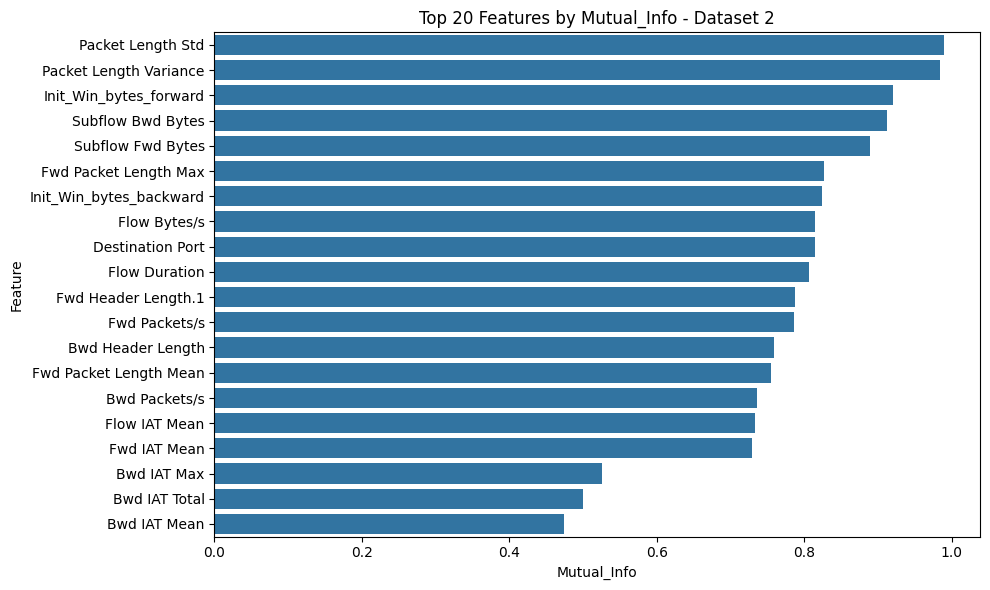

Top 20 features for Dataset 1:


,Feature,ANOVA_F,Chi2,Mutual_Info
13,Fwd IAT Mean,65830.428872,92867.727613,0.729530
21,Bwd Packets/s,55674.033947,70775.227810,0.736803
7,Bwd Packet Length Min,45837.798383,149736.807486,0.467379
25,PSH Flag Count,41259.116722,191384.890498,0.222069
30,Fwd Header Length.1,36153.628944,45196.691097,0.787633
34,act_data_pkt_fwd,34001.149156,77073.797529,0.372376
11,Flow IAT Max,33782.115016,42323.281448,0.827694
14,Fwd IAT Min,33061.206048,63065.776021,0.404094
9,Flow Packets/s,32122.853567,41028.338171,0.763423
2,Flow Duration,30985.851989,39747.060501,0.805974


Top 20 features for Dataset 2:


,Feature,ANOVA_F,Chi2,Mutual_Info
9,Fwd IAT Mean,65830.427255,92867.731844,0.728866
18,Bwd Packets/s,55673.807995,70774.872445,0.736376
5,Bwd Packet Length Min,45837.798383,149736.807486,0.467207
23,PSH Flag Count,41259.116722,191384.890498,0.223017
27,Fwd Header Length.1,36153.628944,45196.691097,0.787722
32,act_data_pkt_fwd,34001.149156,77073.797529,0.373407
10,Fwd IAT Min,33061.206048,63065.776021,0.403194
1,Flow Duration,30985.851989,39747.060501,0.805999
17,Fwd Packets/s,30362.444379,39335.311311,0.786425
7,Flow IAT Mean,29577.461669,38638.053201,0.732898


In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to datasets
path1 = r'N:/DATASET/cic-2017/preprocessing/final_train_set.csv'
path2 = r'N:/DATASET/cic-2017/preprocessing2.ipynb/final_train_set.csv'

# Load datasets
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

# Irrelevant or identifier columns to drop if present
drop_cols = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']

# Plotting function
def plot_top_features(report, title, method='ANOVA_F', top_n=20):
    top = report.nlargest(top_n, method)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top, x=method, y='Feature')
    plt.title(f'Top {top_n} Features by {method} - {title}')
    plt.tight_layout()
    plt.show()

# Feature selection function
def feature_selection_report(df, label_col='Label', k='all', dataset_name=""):
    df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')
    df = df.dropna()

    X = df.drop(columns=[label_col])
    y = df[label_col]

    # Encode categorical features in X
    for col in X.select_dtypes(include=['object', 'category']).columns:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

    # Encode target
    if y.dtype == 'object' or y.dtype.name == 'category':
        y = LabelEncoder().fit_transform(y)

    # Scale features for chi2
    X_scaled = MinMaxScaler().fit_transform(X)

    # ANOVA
    anova = SelectKBest(f_classif, k=k).fit(X, y)
    # Chi2
    chi2_sel = SelectKBest(chi2, k=k).fit(X_scaled, y)
    # Mutual Information
    mi = SelectKBest(mutual_info_classif, k=k).fit(X, y)

    # Result table
    results = pd.DataFrame({
        'Feature': X.columns,
        'ANOVA_F': anova.scores_,
        'Chi2': chi2_sel.scores_,
        'Mutual_Info': mi.scores_
    })

    results = results.sort_values(by='ANOVA_F', ascending=False)

    # Plot top features
    plot_top_features(results, dataset_name, method='ANOVA_F')
    plot_top_features(results, dataset_name, method='Chi2')
    plot_top_features(results, dataset_name, method='Mutual_Info')

    return results

# Feature selection for both datasets
report1 = feature_selection_report(df1, dataset_name='Dataset 1')
report2 = feature_selection_report(df2, dataset_name='Dataset 2')

# Show top 20 features for each dataset
print('Top 20 features for Dataset 1:')
display(report1.head(20))

print('Top 20 features for Dataset 2:')
display(report2.head(20))


In [2]:
def compare_features(df1, df2, label_col='Label'):
    # Drop known irrelevant or non-feature columns
    drop_cols = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp', label_col]
    
    features1 = set(df1.drop(columns=[col for col in drop_cols if col in df1.columns], errors='ignore').columns)
    features2 = set(df2.drop(columns=[col for col in drop_cols if col in df2.columns], errors='ignore').columns)
    
    common = features1 & features2
    only_in_df1 = features1 - features2
    only_in_df2 = features2 - features1

    print(f"✅ Total common features: {len(common)}")
    print(f"❌ Features only in df1: {only_in_df1}" if only_in_df1 else "✔️ No extra features in df1")
    print(f"❌ Features only in df2: {only_in_df2}" if only_in_df2 else "✔️ No extra features in df2")

# Run the check
compare_features(df1, df2)


✅ Total common features: 31
❌ Features only in df1: {'Avg Bwd Segment Size', 'Flow Packets/s', 'Flow IAT Max', 'Total Length of Fwd Packets', 'Average Packet Size', 'Source Port'}
❌ Features only in df2: {'URG Flag Count', 'Active Max', 'Fwd Packets/s', 'Subflow Fwd Bytes', 'Packet Length Std', 'Idle Max'}


In [6]:
import pandas as pd

# Load datasets
path1 = r'N:/DATASET/cic-2017/preprocessing/final_train_set.csv'
path2 = r'N:/DATASET/cic-2017/preprocessing2.ipynb/final_train_set.csv'
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

# Columns to ignore
drop_cols = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']

# Extract feature sets
features1 = set(df1.drop(columns=[col for col in drop_cols + ['Label'] if col in df1.columns], errors='ignore').columns)
features2 = set(df2.drop(columns=[col for col in drop_cols + ['Label'] if col in df2.columns], errors='ignore').columns)

# Identify common features
common_features = list(features1 & features2)

# Retain only common features + label
df1_clean = df1[common_features + ['Label']]
df2_clean = df2[common_features + ['Label']]

# Merge datasets (row-wise)
merged_df = pd.concat([df1_clean, df2_clean], ignore_index=True)

# Save to new file
output_path = r'N:/DATASET/cic-2017/preprocessing/merged_common_features.csv'
merged_df.to_csv(output_path, index=False)

print(f"✅ Merged dataset saved to: {output_path}")
print(f"📊 Shape of merged dataset: {merged_df.shape}")


✅ Merged dataset saved to: N:/DATASET/cic-2017/preprocessing/merged_common_features.csv
📊 Shape of merged dataset: (1689216, 32)


In [ ]:
import pandas as pd

# Load datasets
path1 = r'N:/DATASET/cic-2017/preprocessing/final_train_set.csv'
path2 = r'N:/DATASET/cic-2017/preprocessing2.ipynb/final_train_set.csv'
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

# Columns to ignore
drop_cols = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']

# Extract feature sets
features1 = set(df1.drop(columns=[col for col in drop_cols + ['Label'] if col in df1.columns], errors='ignore').columns)
features2 = set(df2.drop(columns=[col for col in drop_cols + ['Label'] if col in df2.columns], errors='ignore').columns)

# Identify common features
common_features = list(features1 & features2)

# Retain only common features + label
df1_clean = df1[common_features + ['Label']]
df2_clean = df2[common_features + ['Label']]

# Merge datasets (row-wise)
merged_df = pd.concat([df1_clean, df2_clean], ignore_index=True)

# Save to new file
output_path = r'N:/DATASET/cic-2017/preprocessing/merged_common_features.csv'
merged_df.to_csv(output_path, index=False)

print(f"✅ Merged dataset saved to: {output_path}")
print(f"📊 Shape of merged dataset: {merged_df.shape}")


✅ Merged dataset saved to: N:/DATASET/cic-2017/preprocessing/merged_common_features.csv
📊 Shape of merged dataset: (1689216, 32)


In [ ]:
import pandas as pd

# Load datasets
path1 = r'N:/DATASET/cic-2017/preprocessing/final_train_set.csv'
path2 = r'N:/DATASET/cic-2017/preprocessing2.ipynb/final_train_set.csv'
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

# Columns to ignore
drop_cols = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']

# Extract feature sets
features1 = set(df1.drop(columns=[col for col in drop_cols + ['Label'] if col in df1.columns], errors='ignore').columns)
features2 = set(df2.drop(columns=[col for col in drop_cols + ['Label'] if col in df2.columns], errors='ignore').columns)

# Identify common features
common_features = list(features1 & features2)

# Retain only common features + label
df1_clean = df1[common_features + ['Label']]
df2_clean = df2[common_features + ['Label']]

# Merge datasets (row-wise)
merged_df = pd.concat([df1_clean, df2_clean], ignore_index=True)

# Save to new file
output_path = r'N:/DATASET/cic-2017/preprocessing/merged_common_features.csv'
merged_df.to_csv(output_path, index=False)

print(f"✅ Merged dataset saved to: {output_path}")
print(f"📊 Shape of merged dataset: {merged_df.shape}")


✅ Merged dataset saved to: N:/DATASET/cic-2017/preprocessing/merged_common_features.csv
📊 Shape of merged dataset: (1689216, 32)


In [ ]:
import pandas as pd

# Load datasets
path1 = r'N:/DATASET/cic-2017/preprocessing/final_train_set.csv'
path2 = r'N:/DATASET/cic-2017/preprocessing2.ipynb/final_train_set.csv'
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

# Columns to ignore
drop_cols = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']

# Extract feature sets
features1 = set(df1.drop(columns=[col for col in drop_cols + ['Label'] if col in df1.columns], errors='ignore').columns)
features2 = set(df2.drop(columns=[col for col in drop_cols + ['Label'] if col in df2.columns], errors='ignore').columns)

# Identify common features
common_features = list(features1 & features2)

# Retain only common features + label
df1_clean = df1[common_features + ['Label']]
df2_clean = df2[common_features + ['Label']]

# Merge datasets (row-wise)
merged_df = pd.concat([df1_clean, df2_clean], ignore_index=True)

# Save to new file
output_path = r'N:/DATASET/cic-2017/preprocessing/merged_common_features.csv'
merged_df.to_csv(output_path, index=False)

print(f"✅ Merged dataset saved to: {output_path}")
print(f"📊 Shape of merged dataset: {merged_df.shape}")


✅ Merged dataset saved to: N:/DATASET/cic-2017/preprocessing/merged_common_features.csv
📊 Shape of merged dataset: (1689216, 32)


In [ ]:
import pandas as pd

# Load datasets
path1 = r'N:/DATASET/cic-2017/preprocessing/final_train_set.csv'
path2 = r'N:/DATASET/cic-2017/preprocessing2.ipynb/final_train_set.csv'
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

# Columns to ignore
drop_cols = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']

# Extract feature sets
features1 = set(df1.drop(columns=[col for col in drop_cols + ['Label'] if col in df1.columns], errors='ignore').columns)
features2 = set(df2.drop(columns=[col for col in drop_cols + ['Label'] if col in df2.columns], errors='ignore').columns)

# Identify common features
common_features = list(features1 & features2)

# Retain only common features + label
df1_clean = df1[common_features + ['Label']]
df2_clean = df2[common_features + ['Label']]

# Merge datasets (row-wise)
merged_df = pd.concat([df1_clean, df2_clean], ignore_index=True)

# Save to new file
output_path = r'N:/DATASET/cic-2017/preprocessing/merged_common_features.csv'
merged_df.to_csv(output_path, index=False)

print(f"✅ Merged dataset saved to: {output_path}")
print(f"📊 Shape of merged dataset: {merged_df.shape}")


✅ Merged dataset saved to: N:/DATASET/cic-2017/preprocessing/merged_common_features.csv
📊 Shape of merged dataset: (1689216, 32)


In [4]:
from sklearn.preprocessing import MinMaxScaler

def aggregate_and_select_top_features(score_df, top_k=20):
    # Normalize all score columns
    score_cols = ['ANOVA_F', 'Chi2', 'Mutual_Info']
    scaler = MinMaxScaler()
    normalized_scores = pd.DataFrame(
        scaler.fit_transform(score_df[score_cols]),
        columns=[col + '_norm' for col in score_cols]
    )

    # Add normalized scores to original DataFrame
    score_df = pd.concat([score_df, normalized_scores], axis=1)

    # Compute average rank (TODM aggregation)
    score_df['TODM_Score'] = score_df[[col + '_norm' for col in score_cols]].mean(axis=1)

    # Select top features
    top_features = score_df.sort_values(by='TODM_Score', ascending=False).head(top_k)

    return top_features

# Apply to your earlier results
todm_features_df = aggregate_and_select_top_features(report1, top_k=20)
print("🏁 Top features selected by TODM:")
display(todm_features_df[['Feature', 'TODM_Score']])


🏁 Top features selected by TODM:


,Feature,TODM_Score
0,Source Port,0.715469
1,Destination Port,0.626792
2,Flow Duration,0.624838
3,Total Length of Fwd Packets,0.592372
4,Fwd Packet Length Max,0.498398
6,Fwd Packet Length Mean,0.494562
21,Bwd Packets/s,0.472845
9,Flow Packets/s,0.468369
8,Flow Bytes/s,0.462219
20,Bwd Header Length,0.453509


In [5]:
todm_features_df.to_csv('N:/DATASET/cic-2017/preprocessing/todm_top_features.csv', index=False)
